The main problems to be solved by this data science talk have been properly framed, in terms of clients goals background information and purpose of task . 
This ensures that the task is understood and explored to better inform the  decision-making process on the possibl range of approaches and solutions to the probvlems.
This task will extract relevant representative and sufficient case study data from a reputable and reasonables outcomes and outputs. For the data mining and modeling process, the popular
For the data mining and modeling process the classifier, the popular classifier models of Decision Tree, Random Forest, and Multilayer Perception Neural Network will be 
fitted analysed and evaluated in terms of the performance metrics of accuracy, precision, recall and F1-score in predicting the classification of 
diabetes. All signifant interpretations and observations will be noted and considered for future improvements.

Following the purpose of this task, the primary focus will be on diabetes-related factors which are  a range of health measurements including 'Pregnancies', 'Glucose'
'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age', as predictors. Analysing these will help to identify concern
ares and asses and predict the diabetes outcome.

Supervised Machine Learning on Diabetes Prediction

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
#Loading Dataset with pandas (pd)
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data preprocessing is a data mining techniques that transforms raw data into an understandable format. This process has four man stages 
data cleaning data integration data transformation and data reduction.

Data cleaning will filter detect and handle dirty data to ensure quality data and quality analysis results. In this case, there
may be noises of impossible and extreme values and outlers and missing values. The errors may include inconsistant and redundant attributes and data
As the first step,m null values within the dataset will be identified and appropriately replaced if possible

In [4]:
# display the number of entries, the number and names of the column attributes, tghe data type and 
 # digit placings and the memory spcae used 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains 768 rows of records and 9 columns of attributes. The data types of the attributes consist of 1 quantitative discrete binary 6 quantitave
descrete numerical integers, and 2 quantitave continous numerical float with 64 digit placings
The memory space usage is at least 54.1 kilobytes(KB)
Througg this, it is found that there are no null values present in the dataset.
Next, noise of impossible values are checked by analysing the maximum values using box plots and summary statistics.

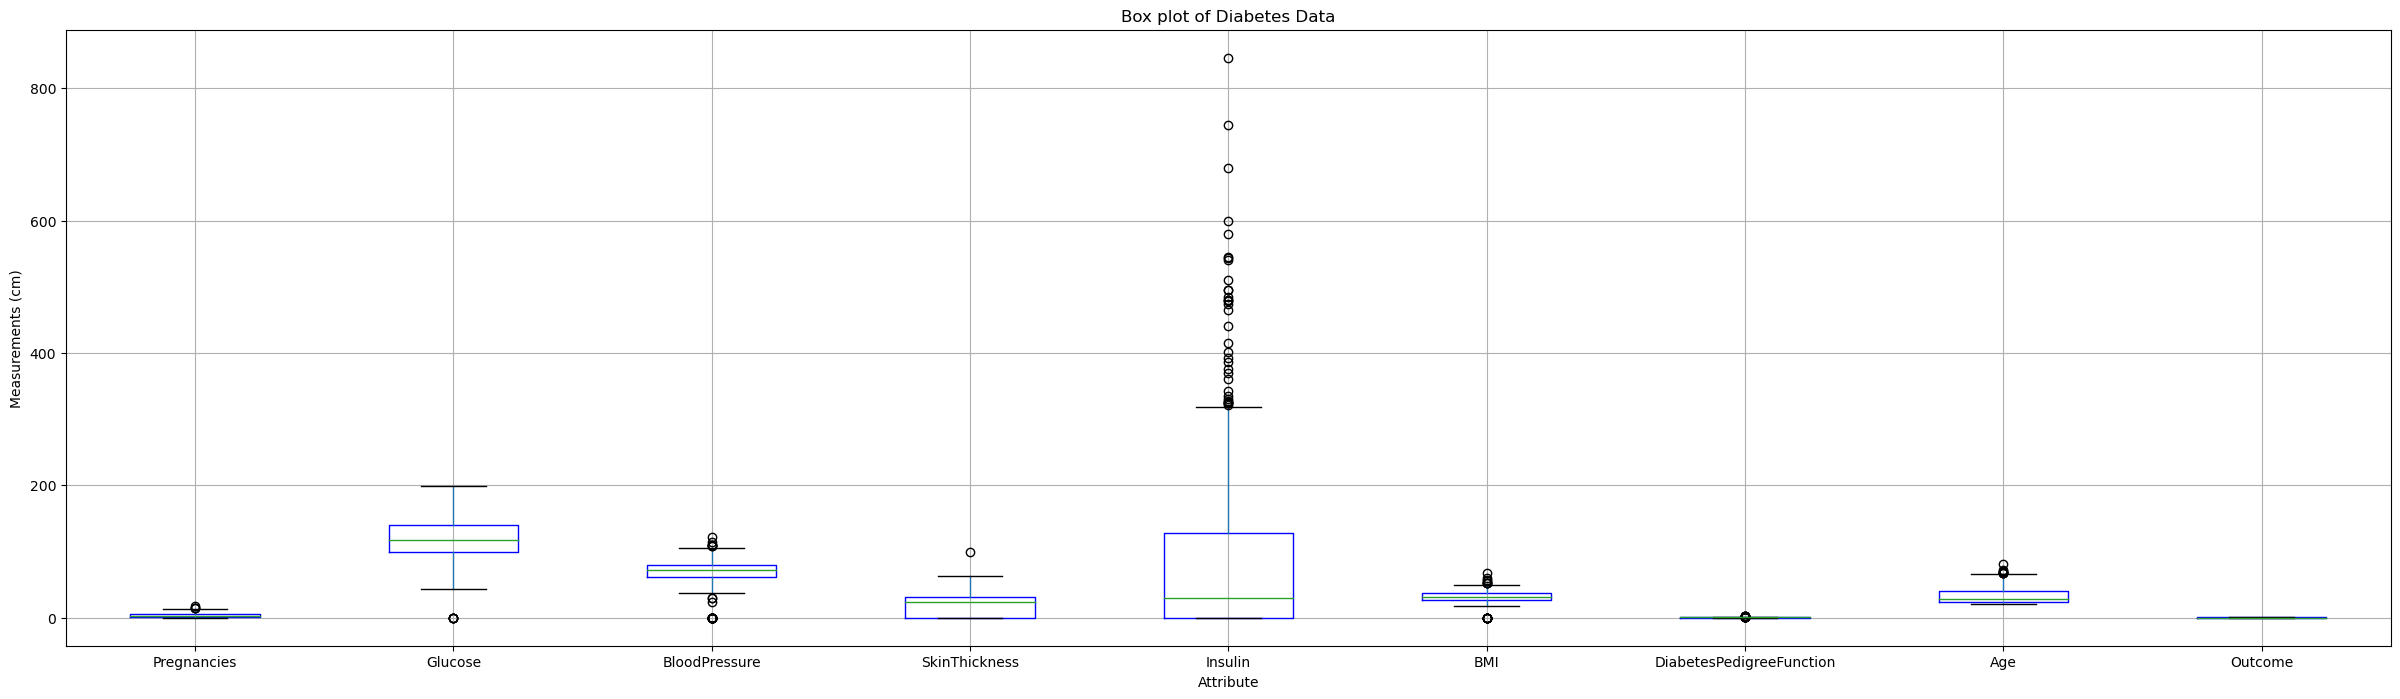

In [5]:
# identify impossible values and outlers using boxplot
data.boxplot(rot = 0, boxprops = dict(color = 'blue'), return_type = 'axes', figsize = (30,8))
plt.title("Box plot of Diabetes Data") # title of plot
plt.suptitle("")
plt.xlabel("Attribute") # x axis label
plt.ylabel("Measurements (cm)") # y axis label
plt.show()

In [6]:
# Summary statistics of the attributes, including measures of central tendency and # measures of dispersion
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Smooth impossible values by replacing the value with the mean value
data['Glucose'] = data['Glucose'].replace(0, data.Glucose.mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data.BloodPressure.mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data.SkinThickness.mean())
data['Insulin'] = data['Insulin'].replace(0, data.Insulin.mean())
data['BMI'] = data['BMI'].replace(0, data.BMI.mean())

The maximum and minimum values are checked to ensure thata all noises of impossible values have been smoothed

In [8]:
# We confirm smoothed impossible valus
# Summary statistics of the attributes, including measures of central tenancy and measure of dispersion

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Detect duplicated records
data[data.duplicated(subset = None, keep = False)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


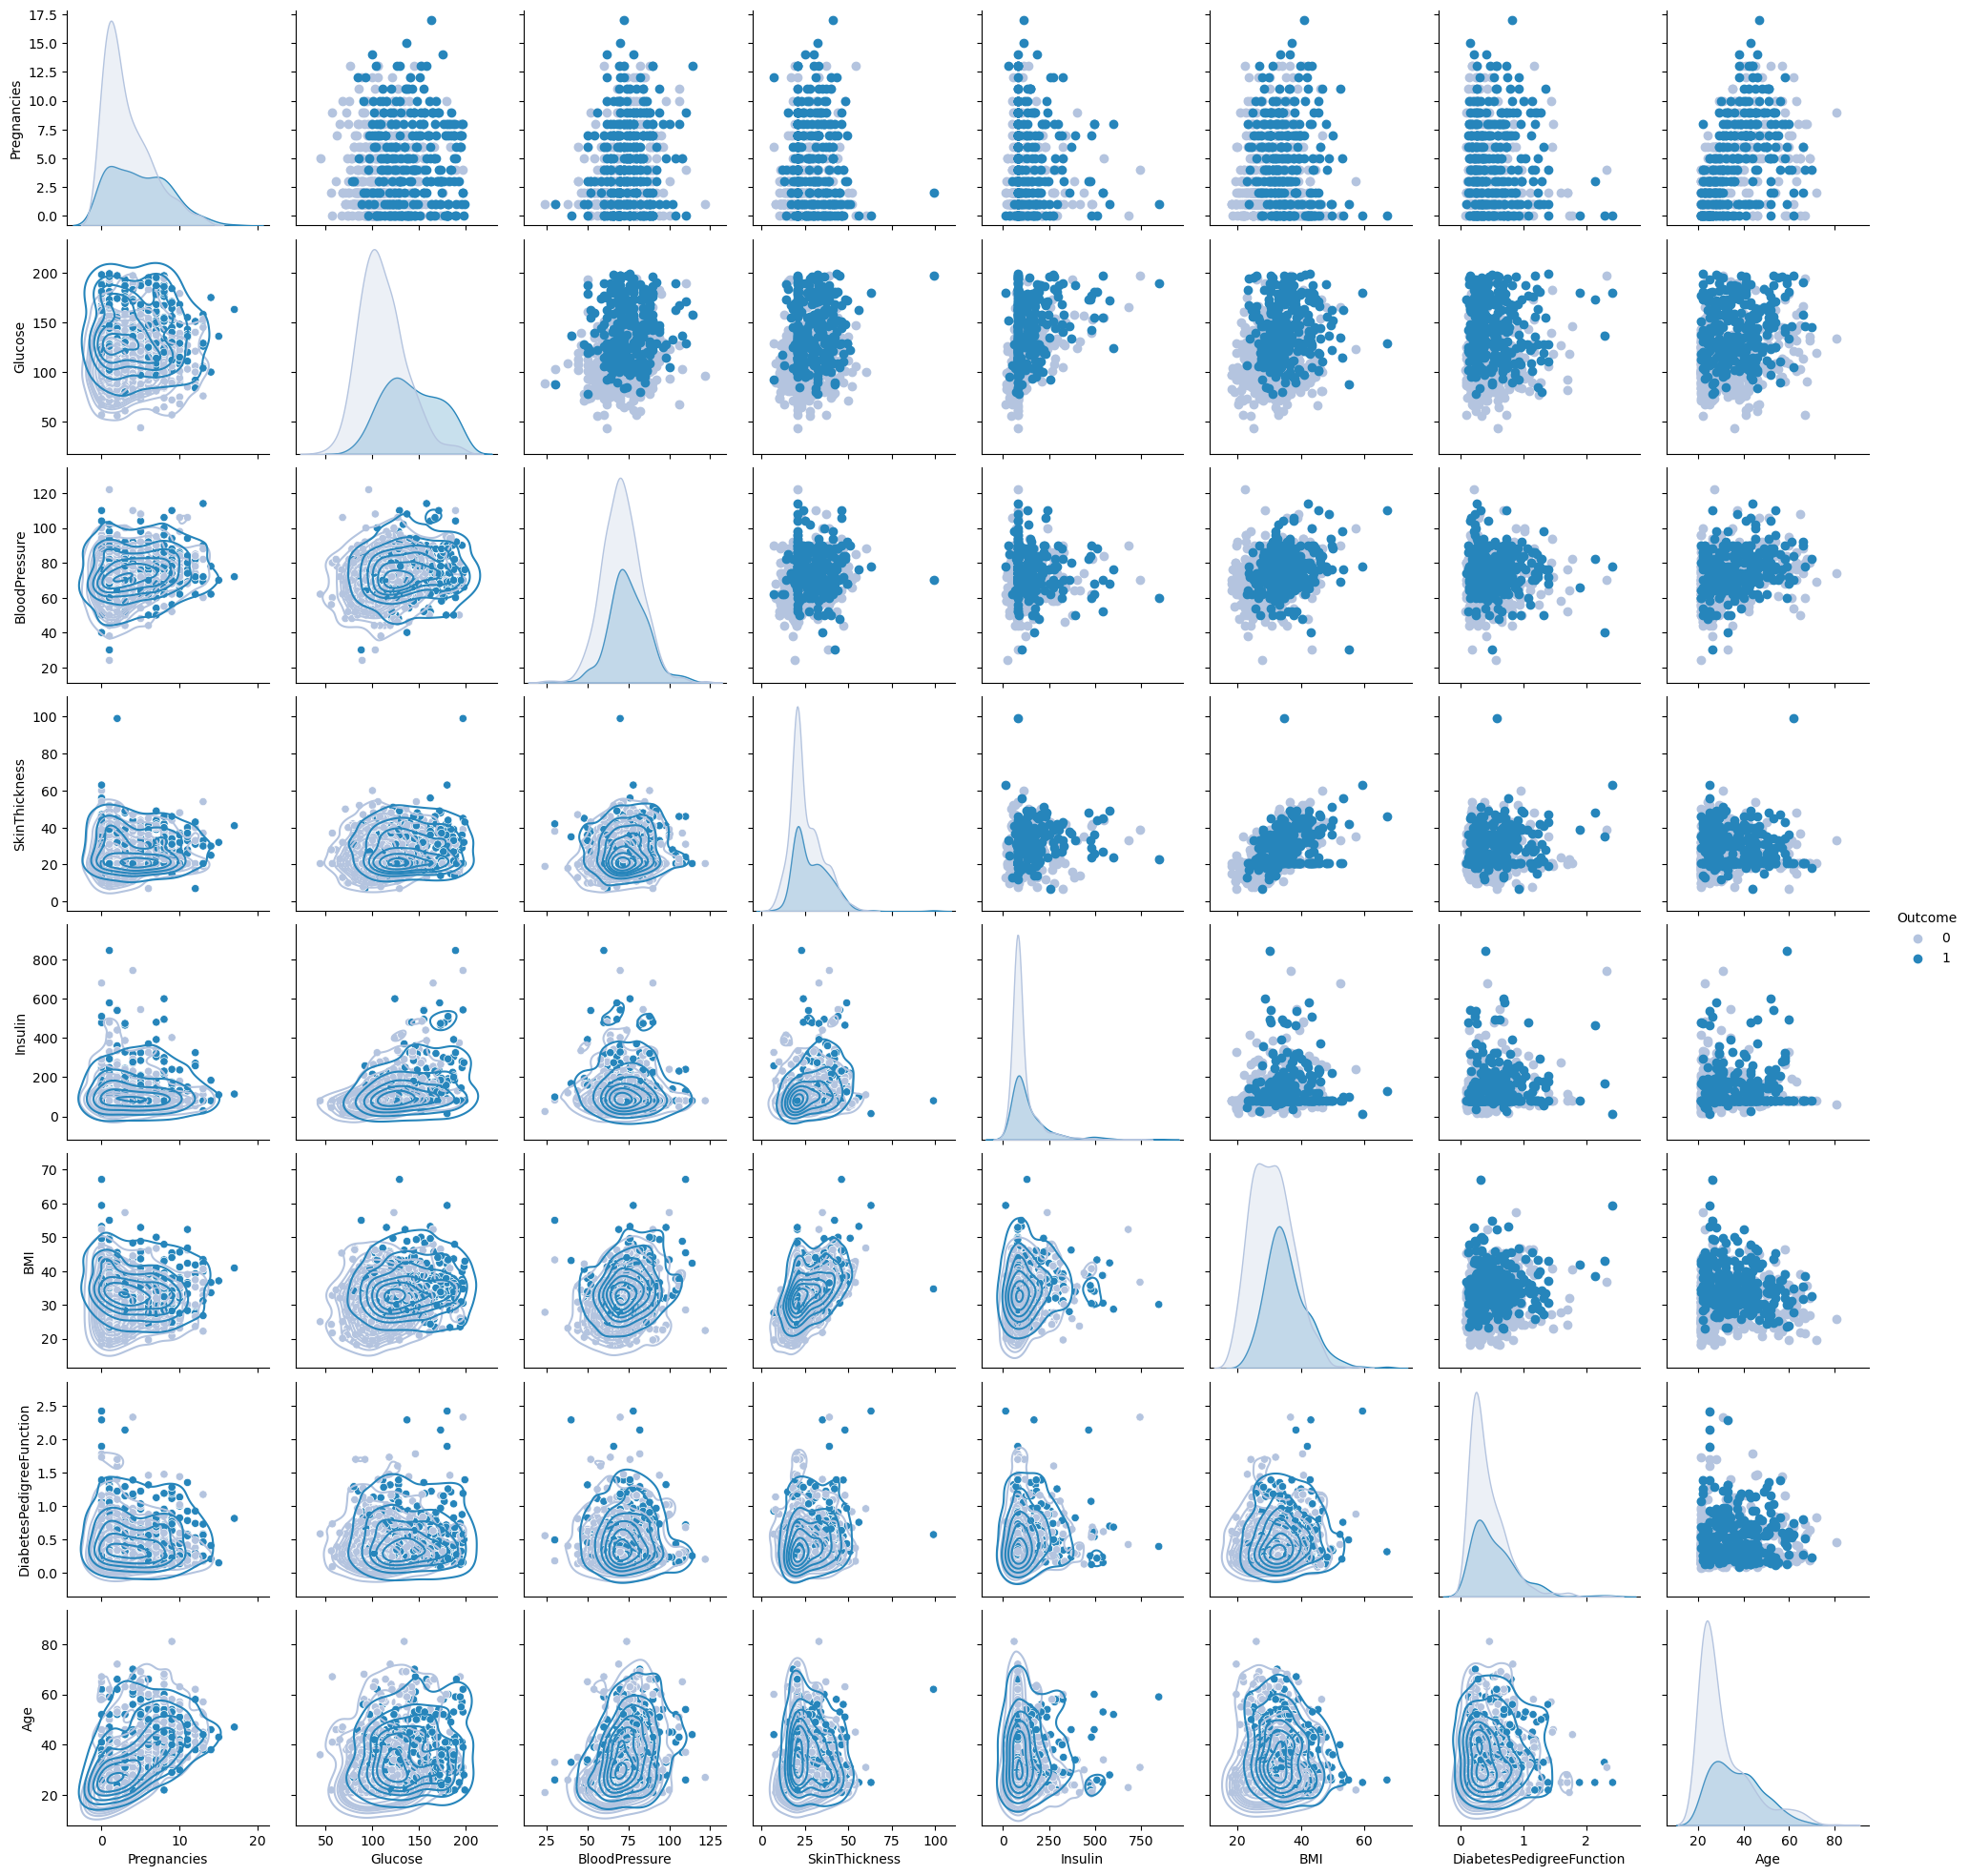

In [10]:
# Import seaborn library for more variety of data visualisation using fewer syntax and interesting default themes 
import seaborn as sns

# Visualise pairs plot or scatterplot matrix in relation to diabetes outcome
g = sns.pairplot(data, hue = 'Outcome', palette = 'PuBu')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

In [11]:
# Display the number of entries, the number and names of the column attributes, the data type and 
# digit placings, and the  memory space used
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [12]:
# List and count the target class label names and their frequency
from collections import Counter
count = Counter(data['Outcome'])
count.items()

dict_items([(1, 268), (0, 500)])

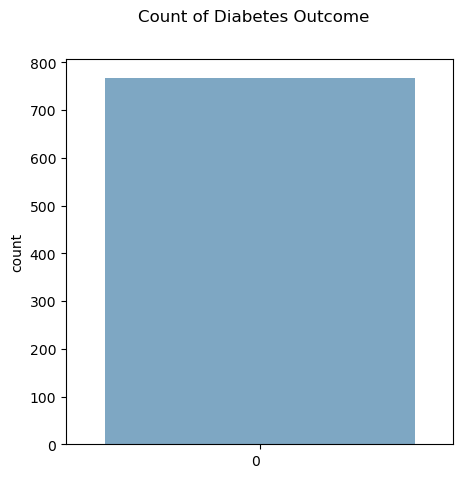

In [20]:
# Count of each target class label
plt.figure(figsize = (5, 5))
ax = sns.countplot(data['Outcome'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation =  0, ha = "right")
plt.suptitle("Count of Diabetes Outcome")
plt.show()


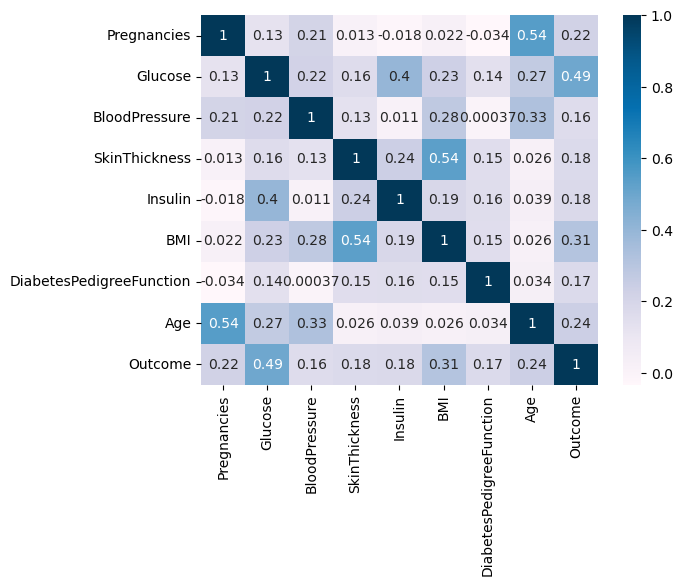

In [14]:
# Compare linear relations between attributes using correlation coefficient generated using Correlation matrix
sns.heatmap(data.corr(),cmap = 'PuBu', annot = True)
plt.show()

In [15]:
# Summarise main characteristics by displaying the summary statistics of the attributes, including 
# measures of central tendency , and measures of dispersion
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
import math
import numpy as np
import matplotlib.pyplot as plt

# Assume data is already loaded and cleaned
# Make sure 'data' and other necessary variables (X, y) are defined before this code block

data['Outcome'] = data.Outcome.astype(str)
data['Outcome'] = data.Outcome.astype(object)

# Split dataset into attributes and labels
X = data.iloc[:, :-1].values # the attributes
y = data.iloc[:, 8].values # the labels
# Choose appropriate range of training set proportions
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# Define the models
DT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
NB = GaussianNB()
# Choose recommended optimal number of neighbors using sqrt(number of records)
KNN = KNeighborsClassifier(n_neighbors=int(np.ceil(np.sqrt(768))))
RF = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_leaf=1)
SVM = SVC(kernel='rbf', C=1.0, gamma='scale')


# Find best training set proportion for the chosen models 
plt.figure()
for model in [DT, NB, KNN, SVM, RF, SVC]:
    scores_mean = []
    for s in t:
        scores = []
        for i in range(1, 1000):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-s, random_state=987)
            DT.fit(X_train, y_train) 
            # consider DT scores
            scores.append(DT.score(X_test, y_test))
            NB.fit(X_train, y_train) 
            # Consider NB scores
            scores.append(NB.score(X_test, y_test))
            KNN.fit(X_train, y_train)
            #  Consider KNN scores
            scores.append(KNN.score(X_test, y_test))
            RF.fit(X_train, y_train)
            #  Consider RF scores
            scores.append(RF.score(X_test, y_test))
            SVM.fit(X_train, y_train)
         #  Consider SVM scores
            scores.append(SVM.score(X_test, y_test))
        plt.plot(s, np.mean(scores), 'bo')
                          
# X axis label
plt.xlabel('Training Set Proportion') 
# y axis label
plt.ylabel('Accuracy')
# Show the legend
plt.legend()
# Show the plot
plt.show()

In [ ]:
# Find best training set proportion for the chosen models 
plt.figure()
for model in [DT, NB, KNN, RF, SVM]:
    scores_mean = []
    for s in t:
        scores = []
        for i in range(1, 1000):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-s, random_state=987)
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))
        scores_mean.append(np.mean(scores))
    # Plot the accuracy
    plt.plot(t, scores_mean, label=model.__class__.__name__)

# X axis label
plt.xlabel('Training Set Proportion') 
# y axis label
plt.ylabel('Accuracy')
# Show the legend
plt.legend()
# Show the plot
plt.show()


In [ ]:
# Choose train test splits from original dataset as 80% train data and 20% test data for highest accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=987)

# Find optimal it number of clusters
k_range = range(1, 25)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figures()
plt.xlabel('k') # X axis label
plt.ylabel('Accuracy') # y axis label
plt.scatter([0, 5, 10, 15, 20, 25]);